<a href="https://colab.research.google.com/github/srijeem/Machine-Learning-and-Data-Analysis/blob/main/Wine_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Upload the dataset (Google Colab specific)

from google.colab import files
uploaded = files.upload()


Saving winequality.csv to winequality.csv


In [10]:
# Load the dataset

df = pd.read_csv("winequality.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


**Data Overview**

In [11]:
# Displaying the shape, info, and summary statistics of the dataset

print("Shape:", df.shape)
df.info()
df.describe()

Shape: (4898, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
# Checking for missing values in the dataset

df.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**Class Distribution and Visualization:**

In [13]:
# Display the count of each quality score

df['quality'].value_counts().sort_index()


,count
quality,
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


<ipython-input-18-0a87237603fd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='Set2')


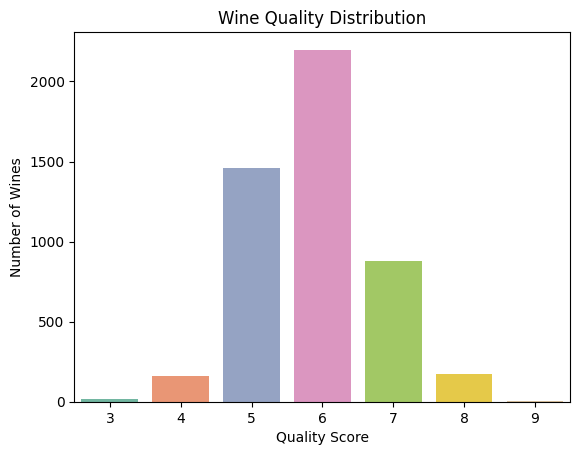

In [18]:
# Plotting the distribution of wine quality using a countplot


sns.countplot(x='quality', data=df, palette='Set2')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Number of Wines')
plt.show()


**Feature Distribution (Visualizing Specific Features):**

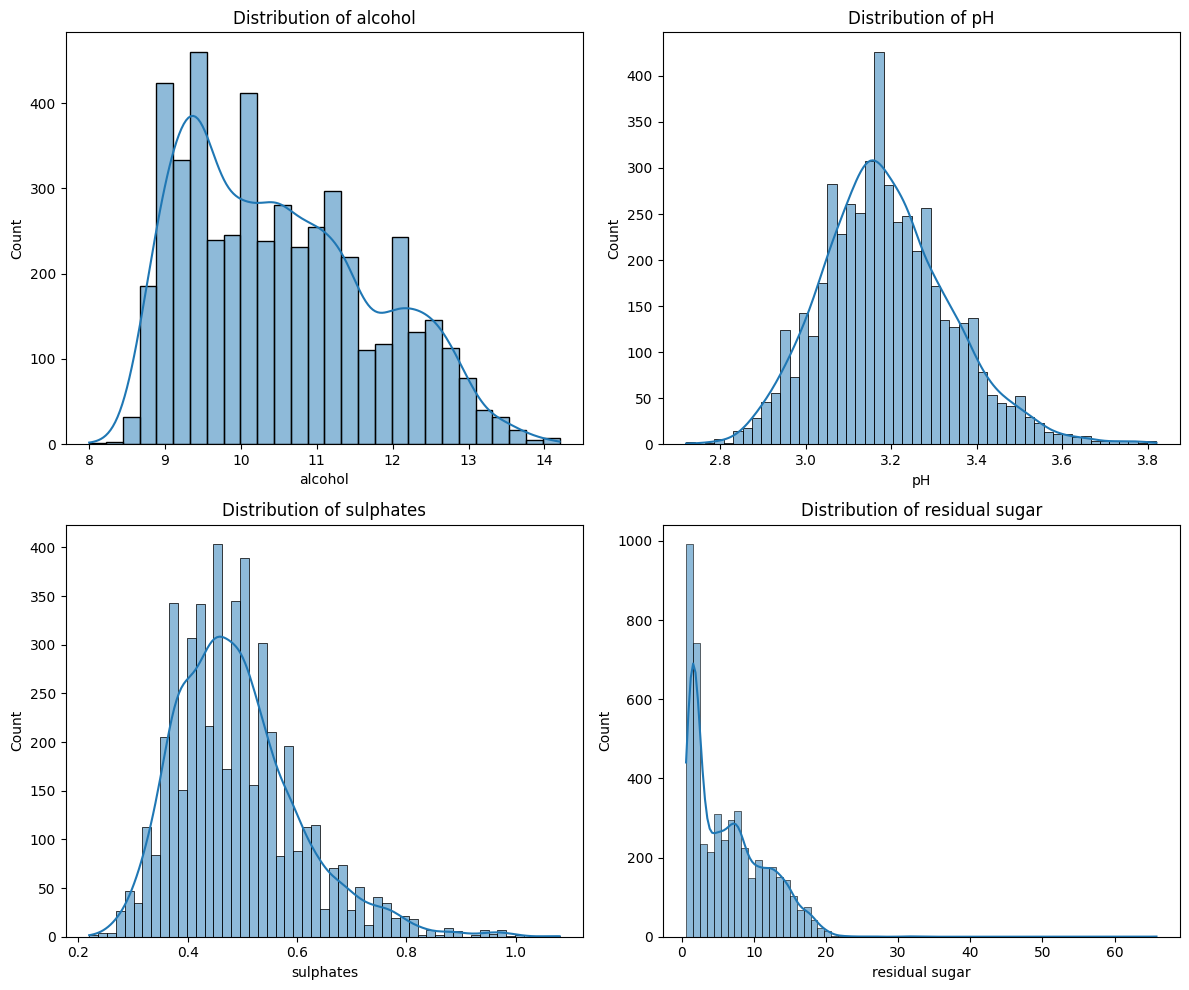

In [23]:
# List of features you want to visualize
features = ['alcohol', 'pH', 'sulphates', 'residual sugar']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns
axes = axes.ravel()  # Flatten the axes array for easier iteration

# Loop through the features and plot them in subplots
for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i])  # 'ax' for subplot placement
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

**Binning:**

In [19]:
# Binning into 3 classes: Low (3–5), Medium (6), High (7–9)
df['quality_label'] = df['quality'].apply(lambda x: 'low' if x <= 5 else 'medium' if x == 6 else 'high')
df['quality_label'].value_counts()


,count
quality_label,
medium,2198
low,1640
high,1060


<ipython-input-20-e34ff28d9643>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality_label', data=df, palette='Set3')


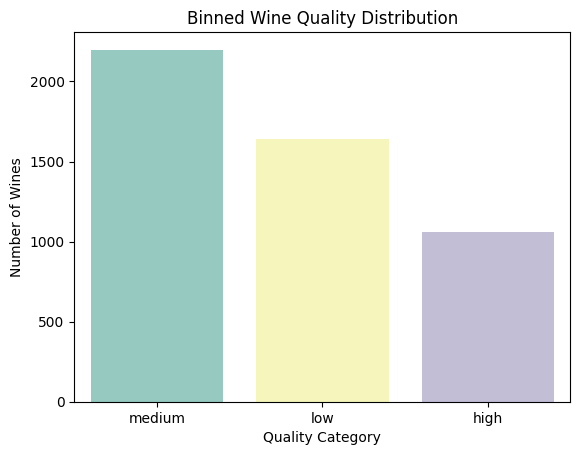

In [20]:
# Visualize the binned wine quality distribution using a countplot

sns.countplot(x='quality_label', data=df, palette='Set3')
plt.title('Binned Wine Quality Distribution')
plt.xlabel('Quality Category')
plt.ylabel('Number of Wines')
plt.show()


**Correlation Analysis:**

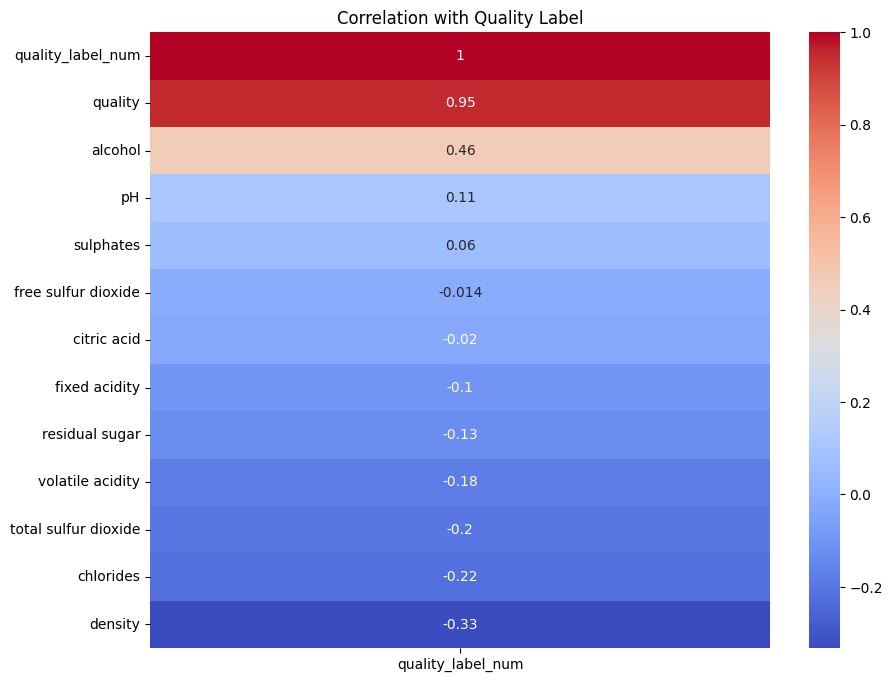

In [21]:
# Encode quality_label to numeric for correlation
df_corr = df.copy()
df_corr['quality_label_num'] = df_corr['quality_label'].map({'low': 0, 'medium': 1, 'high': 2})
corr = df_corr.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['quality_label_num']].sort_values(by='quality_label_num', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Quality Label')
plt.show()


**Outlier Detection**

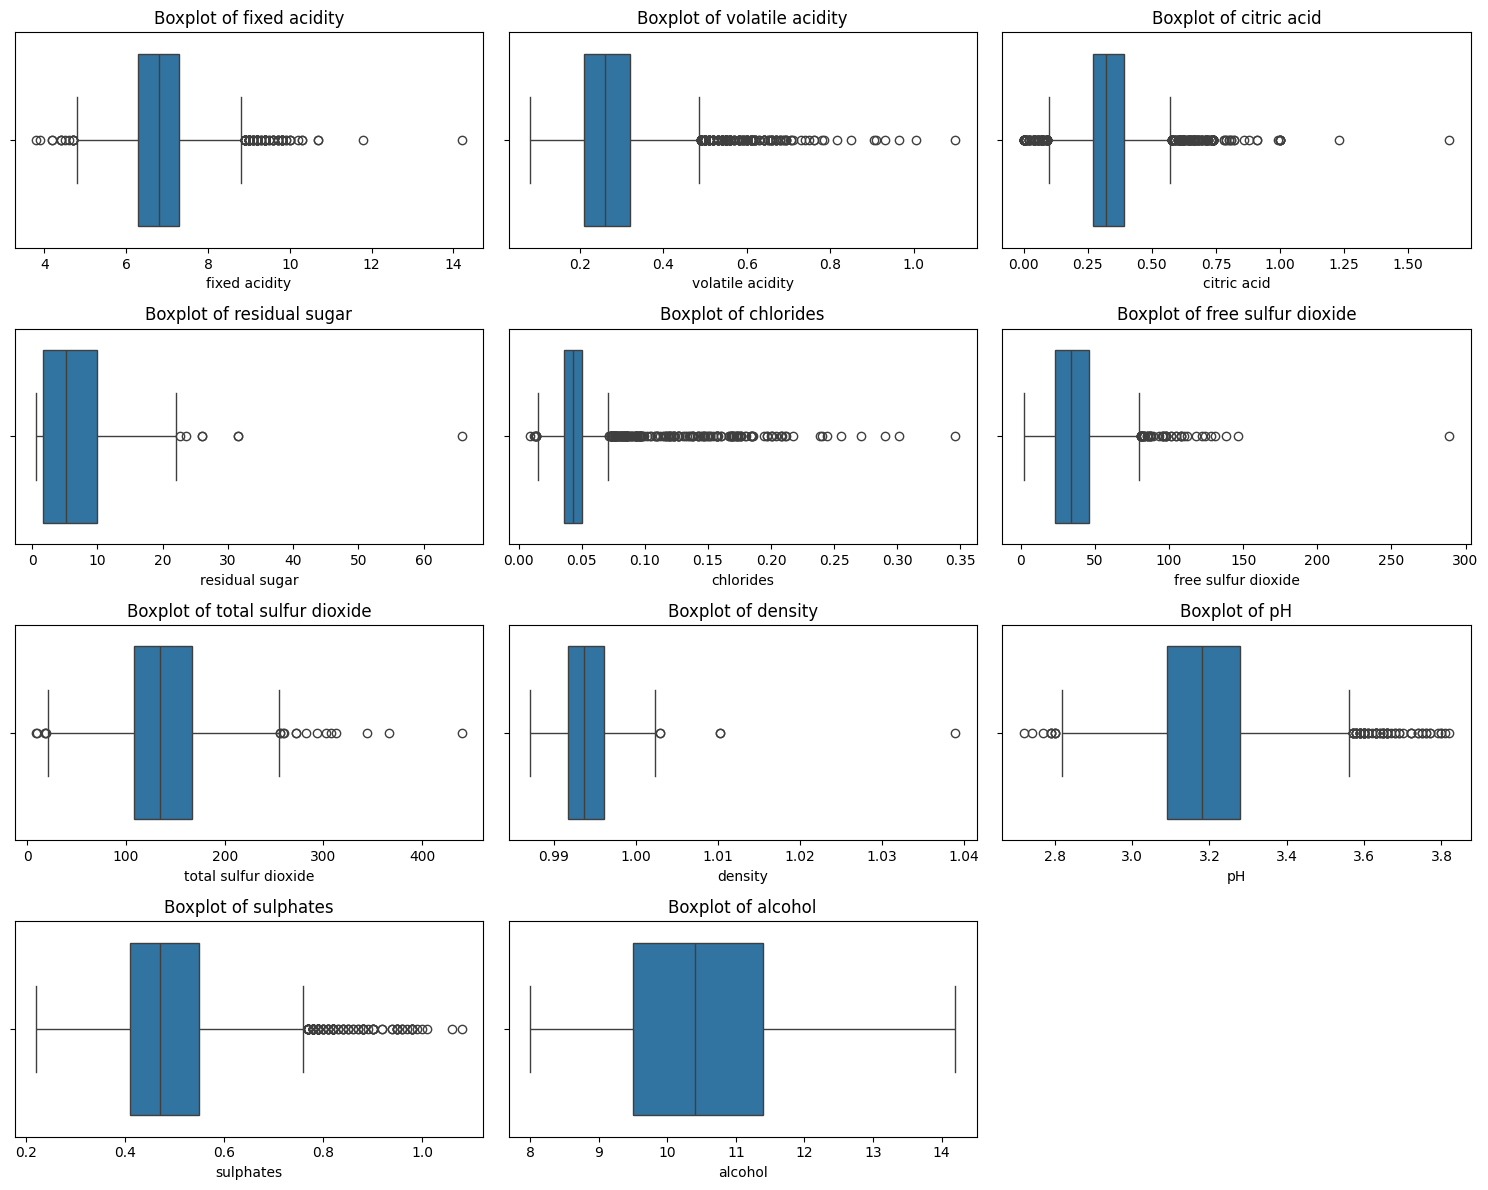

In [24]:
# List of numerical features
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                      'pH', 'sulphates', 'alcohol']

# Plotting boxplots to detect outliers
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)  # 4 rows, 3 columns
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

**Pair Plot**:
focusing on the key features and their relationship to the quality labels.

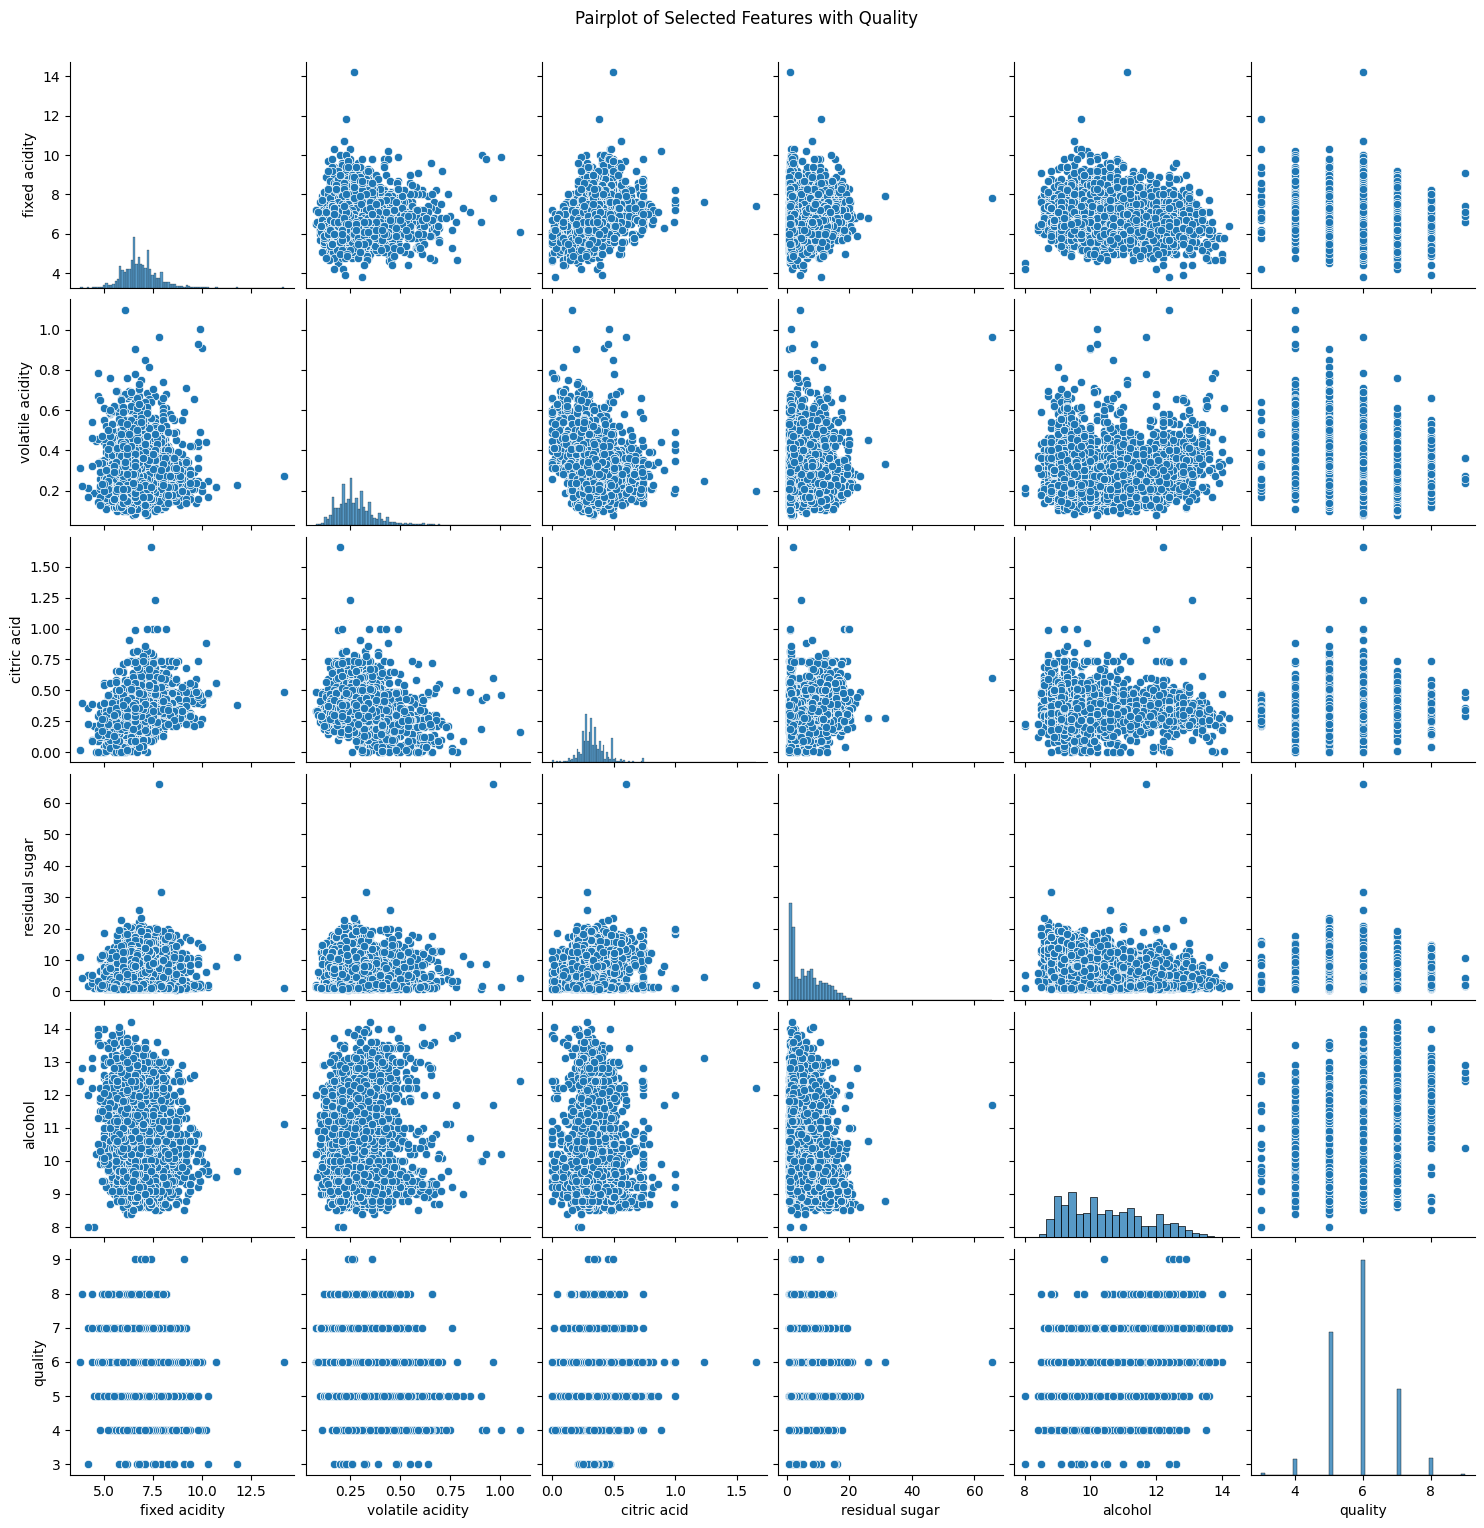

In [25]:
# Pair plot for key features
sns.pairplot(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol', 'quality']])
plt.suptitle("Pairplot of Selected Features with Quality", y=1.02)
plt.show()

Target vs Feature Visualization

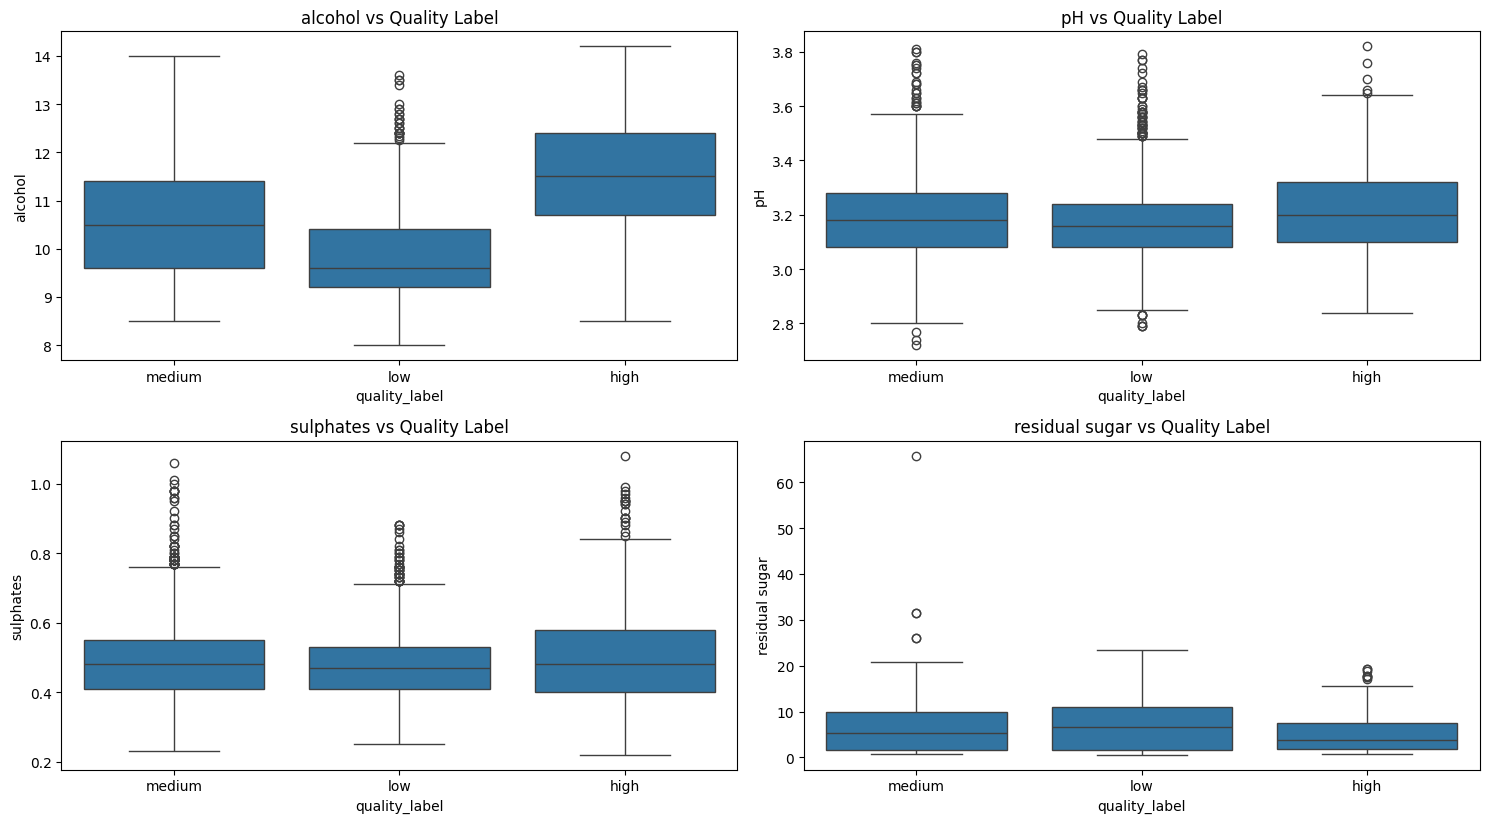

In [30]:
# Boxplots showing the relationship between selected features and the quality label

plt.figure(figsize=(15, 12))

for i, col in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='quality_label', y=col, data=df)
    plt.title(f'{col} vs Quality Label')

plt.tight_layout()
plt.show()


Feature Distributions

In [27]:
# Show skewness and kurtosis for each feature
from scipy.stats import skew, kurtosis

skewness = df[numerical_features].apply(lambda x: skew(x))
kurt = df[numerical_features].apply(lambda x: kurtosis(x))

print(f"Skewness:\n{skewness}\n")
print(f"Kurtosis:\n{kurt}")

Skewness:
fixed acidity           0.647553
volatile acidity        1.576497
citric acid             1.281528
residual sugar          1.076764
chlorides               5.021792
free sulfur dioxide     1.406314
total sulfur dioxide    0.390590
density                 0.977474
pH                      0.457642
sulphates               0.976894
alcohol                 0.487193
dtype: float64

Kurtosis:
fixed acidity            2.168737
volatile acidity         5.085205
citric acid              6.167374
residual sugar           3.465054
chlorides               37.525039
free sulfur dioxide     11.453416
total sulfur dioxide     0.570045
density                  9.782587
pH                       0.529009
sulphates                1.588081
alcohol                 -0.698937
dtype: float64
